# **Objetivo**

*   Desarrollar un proceso de clasificación
para poder determinar si el paciente
puede o no padecer una enfermedad con
base a la información de sus respuestas.

**El desarrollo del proyecto constará de 3 módulos:**

* Módulo de clasificación.
* Módulo de aplicación de encuestas.
* Módulo Web de reportes ejecutivos.


## **Módulo de Clasificación**
Para este módulo se debe desarrollar:
* Un análisis exploratorio de cada una de las variables del archivo **respuestas.csv**.
* Un análisis de dependencias directas e indirectas a todas estas
variables en **respuestas.csv**, sus distribuciones o cualquier grafica que aporte significado.

Los dos puntos anteriores deben de guardados en un archivo:
# **exploratorio.ipynb**


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Una primera mirada al dataset

In [ ]:
#guardamos la ruta del archivo en una variable
file = '/content/drive/MyDrive/datasets/datasets/respuestas.csv'
df = pd.read_csv(file, header=0, sep=',')
# Usar el método dropna() para eliminar filas con valores nulos
print(df.head(3))
#print(df.columns)
#df.dtypes

  Sexo Edad  Fumador dedos amarillos Ansiedad  presion de grupo  \
0    M   57      1.0               1        2               2.0   
1    M   82      2.0               2        2               2.0   
2    M   44      1.0               1        2               2.0   

   enfermedad cronica fatiga Alergia Sibilancias  Consumo Alcohol  Tos  \
0                 1.0      1       2           1              2.0  2.0   
1                 1.0      2       2           2              2.0  1.0   
2                 2.0      2       2           1              1.0  1.0   

   Dificultad respirar  Dificultad tragar Dolor en pecho Cancer de pulmon  
0                  2.0                2.0              2              YES  
1                  1.0                2.0              1              YES  
2                  1.0                2.0              2              YES  


In [ ]:
# Mostrar información sobre el conjunto de datos (columnas, tipos de datos, etc.)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sexo                 9998 non-null   object 
 1   Edad                 9998 non-null   object 
 2   Fumador              9999 non-null   float64
 3   dedos amarillos      9998 non-null   object 
 4   Ansiedad             9998 non-null   object 
 5   presion de grupo     9998 non-null   float64
 6   enfermedad cronica   9999 non-null   float64
 7   fatiga               9998 non-null   object 
 8   Alergia              9999 non-null   object 
 9   Sibilancias          9997 non-null   object 
 10  Consumo Alcohol      9999 non-null   float64
 11  Tos                  9999 non-null   float64
 12  Dificultad respirar  9997 non-null   float64
 13  Dificultad tragar    9999 non-null   float64
 14  Dolor en pecho       10000 non-null  object 
 15  Cancer de pulmon     10000 non-null  

# Limpieza

## Datos faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

In [ ]:
print(df.isnull().sum())
# Filtrar las filas que contienen valores nulos en cualquier columna
filas_nulas = df[df.isnull().any(axis=1)]

# Mostrar las filas que contienen valores nulos
print(filas_nulas)

Sexo                   2
Edad                   2
Fumador                1
dedos amarillos        2
Ansiedad               2
presion de grupo       2
enfermedad cronica     1
fatiga                 2
Alergia                1
Sibilancias            3
Consumo Alcohol        1
Tos                    1
Dificultad respirar    3
Dificultad tragar      1
Dolor en pecho         0
Cancer de pulmon       0
dtype: int64
     Sexo Edad  Fumador dedos amarillos Ansiedad  presion de grupo  \
4060    F   78      1.0               2        1               1.0   
4080    M   81      1.0               1        1               1.0   
4111    M   72      2.0               1        1               NaN   
4201    F   78      1.0             NaN        1               2.0   
7937    M   44      1.0               2        2               2.0   
8187    F   38      1.0               2        2               1.0   
8189    M   58      2.0               1        1               2.0   
8190    M  NaN      2.0    

In [ ]:
# Verificar si hay valores nulos en cada columna
df.dropna(inplace=True)
print(df.isnull().sum())

Sexo                   0
Edad                   0
Fumador                0
dedos amarillos        0
Ansiedad               0
presion de grupo       0
enfermedad cronica     0
fatiga                 0
Alergia                0
Sibilancias            0
Consumo Alcohol        0
Tos                    0
Dificultad respirar    0
Dificultad tragar      0
Dolor en pecho         0
Cancer de pulmon       0
dtype: int64


## Filas repetidas

In [ ]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (9988, 16)
Tamaño del set después de eliminar las filas repetidas: (9968, 16)


## *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

<ipython-input-8-8210c96bf100>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)  # Rotar etiquetas del eje x


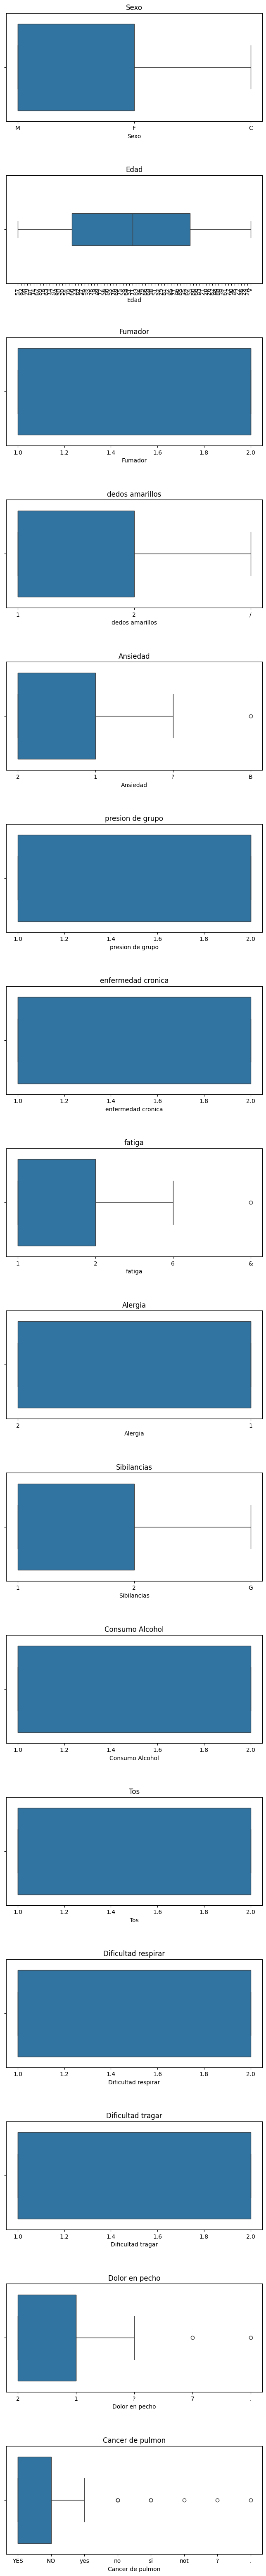

In [ ]:
fig, ax = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(8, 5 * len(df.columns)))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(df.columns):
    if col == 'Edad':
        sns.boxplot(x=col, data=df, ax=ax[i], width=0.3)
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)  # Rotar etiquetas del eje x
    else:
        sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

plt.show()

In [ ]:
# Análisis exploratorio de cada variable
# Es casi lo mismo que lo de arriba
for column in df.columns:
    print(f"Análisis de la variable: {column}")
    print(f"Número de valores únicos: {df[column].nunique()}")
    print(f"Valores únicos: {df[column].unique()}")
    print(f"Tipo de datos: {df[column].dtype}")
    print(df[column].describe())
    print(f"Número de valores nulos: {df[column].isnull().sum()}")  # Contar valores nulos
    print("\n")

In [ ]:
# Eliminar filas con 'Sexo' =='C'
print(f'Tamaño del set antes de eliminar registros de edad: {df.shape}')
df = df[df['Sexo']!='C']
# Eliminar filas con 'Edad' =='V'
df = df[df['Edad']!='V']
# Eliminar filas con 'dedos amarillos' =='/'
df = df[df['dedos amarillos']!='/']
# Eliminar filas con 'Sibilancias' =='G
df = df[df['Sibilancias']!='G']
# Eliminar filas con 'Sibilancias' =='G
df = df[df['Sibilancias']!='G']
# Eliminar filas con 'Ansiedad' =='?, B'
df = df[df['Ansiedad']!='?']
df = df[df['Ansiedad']!='B']
# Eliminar filas con 'fatiga' =='6,&'
df = df[df['fatiga']!='6']
df = df[df['fatiga']!='&']
# Eliminar filas con 'Dolor en pecho' =='?' '7' '.'
df = df[df['Dolor en pecho']!='?' ]
df = df[df['Dolor en pecho']!='7']
df = df[df['Dolor en pecho']!='.']

print(f'Tamaño del set después de eliminar registros de edad: {df.shape}')

Tamaño del set antes de eliminar registros de edad: (9968, 16)
Tamaño del set después de eliminar registros de edad: (9957, 16)


<ipython-input-10-8210c96bf100>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)  # Rotar etiquetas del eje x


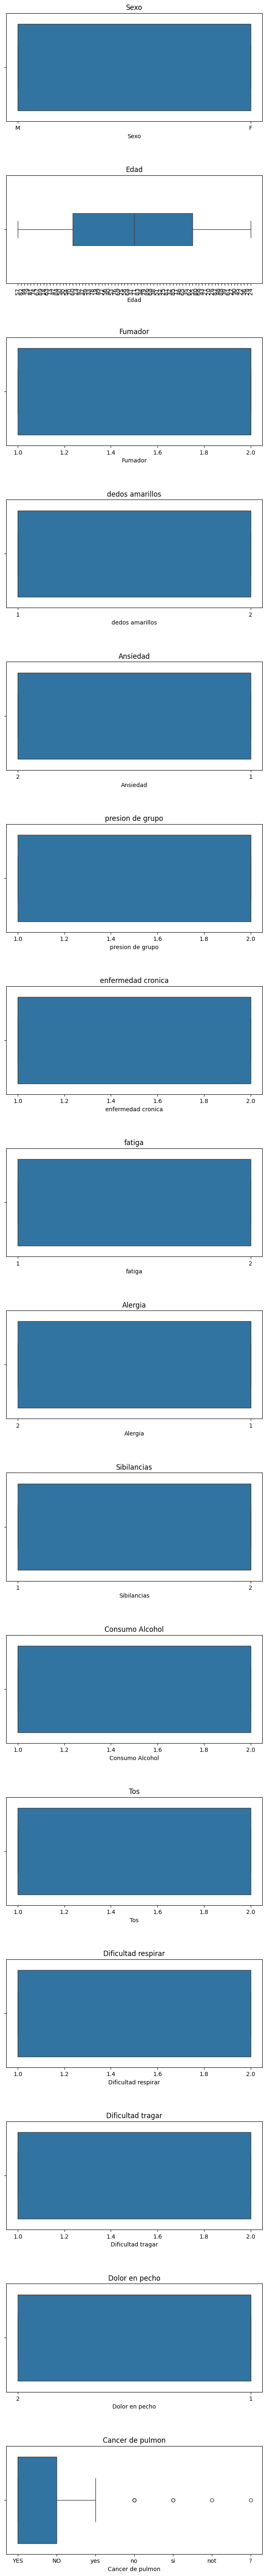

In [ ]:
fig, ax = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(8, 5 * len(df.columns)))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(df.columns):
    if col == 'Edad':
        sns.boxplot(x=col, data=df, ax=ax[i], width=0.3)
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)  # Rotar etiquetas del eje x
    else:
        sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

plt.show()

## Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "YES" y "si" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

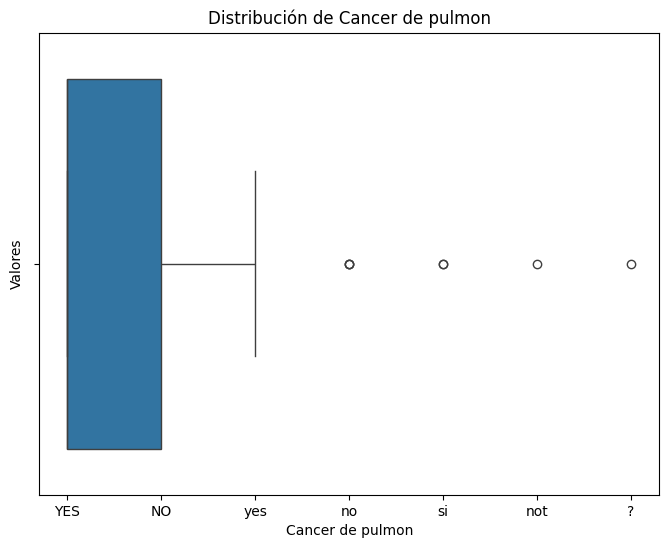

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cancer de pulmon', data=df)
plt.title('Distribución de Cancer de pulmon')
plt.xlabel('Cancer de pulmon')
plt.ylabel('Valores')
plt.show()

Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula.

Unifiquemos estos sub-niveles inicialmente:

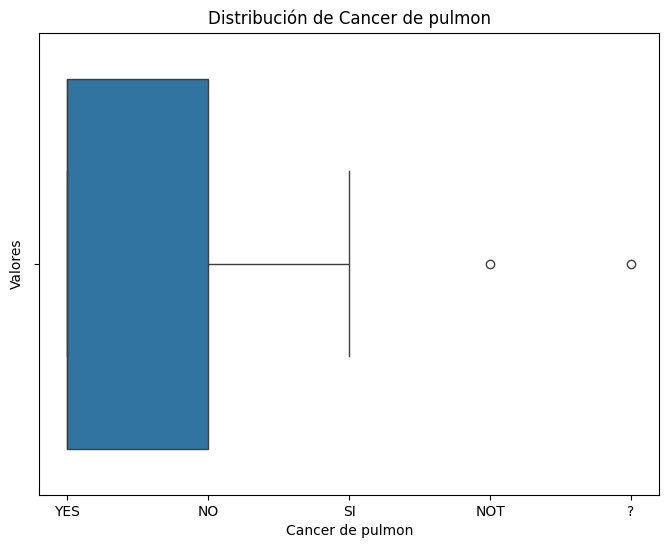

In [ ]:
for column in df.columns:
    # Representar en mayusculas
    if column in 'Cancer de pulmon':
        df[column] = df[column].str.upper()

# Y generemos las gráficas nuevamente
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cancer de pulmon', data=df)
plt.title('Distribución de Cancer de pulmon')
plt.xlabel('Cancer de pulmon')
plt.ylabel('Valores')
plt.show()

['YES' 'NO' 'SI' 'NOT' '?']
['YES' 'NO' '?']


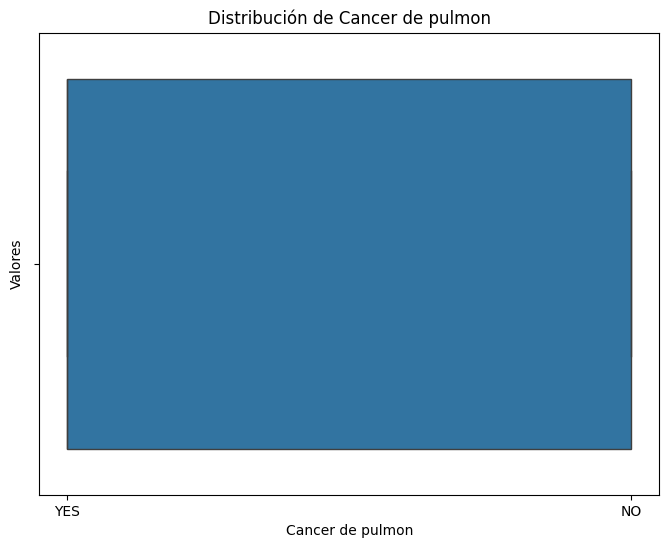

In [ ]:
# Cancer de pulmon: unificar SI y YES
print(df['Cancer de pulmon'].unique())
df['Cancer de pulmon'] = df['Cancer de pulmon'].str.replace('SI','YES', regex=False)
# Cancer de pulmon: unificar NOT y NO
df['Cancer de pulmon'] = df['Cancer de pulmon'].str.replace('NOT','NO', regex=False)
print(df['Cancer de pulmon'].unique())

# Eliminamos los Cancer de pulmon que tengan ?
df = df[df['Cancer de pulmon']!='?']

# Y generemos las gráficas nuevamente
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cancer de pulmon', data=df)
plt.title('Distribución de Cancer de pulmon')
plt.xlabel('Cancer de pulmon')
plt.ylabel('Valores')
plt.show()

In [ ]:
#le = LabelEncoder()
df['Sexo'] = df['Sexo'].map({'M': 1, 'F': 2})
df['Cancer de pulmon'] = df['Cancer de pulmon'].map({'NO': 1, 'YES': 2})

# Convertir columnas a tipo float
columns_to_convert = ['Edad', 'dedos amarillos', 'Ansiedad', 'fatiga', 'Alergia',\
                      'Sibilancias', 'Dolor en pecho','Sexo']

for column in columns_to_convert:
    df[column] = df[column].astype(float)

In [ ]:
def check_object_columns(data):
    object_columns = data.select_dtypes(include=['object']).columns
    for column in object_columns:
        print(f"Valores únicos para la columna '{column}':")
        print(data[column].unique())

check_object_columns(df)

In [ ]:
df['Cancer de pulmon']
df['Cancer de pulmon'] = df['Cancer de pulmon'].astype(float)

In [ ]:
# Vemos los tipos de datos
df.dtypes

Sexo                   float64
Edad                   float64
Fumador                float64
dedos amarillos        float64
Ansiedad               float64
presion de grupo       float64
enfermedad cronica     float64
fatiga                 float64
Alergia                float64
Sibilancias            float64
Consumo Alcohol        float64
Tos                    float64
Dificultad respirar    float64
Dificultad tragar      float64
Dolor en pecho         float64
Cancer de pulmon       float64
dtype: object

ya hemos realizado la limpieza de nuestro set de datos

In [ ]:
ruta ='/content/drive/MyDrive/datasets/datasets/respuestas_limpio.csv'
df.to_csv(ruta, index=False)

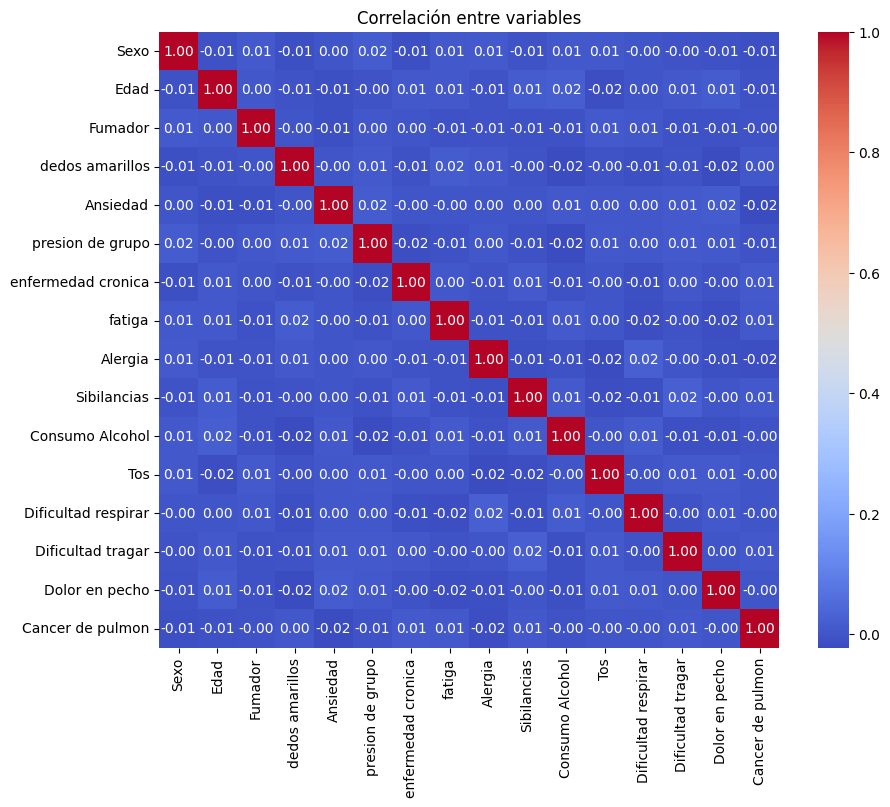

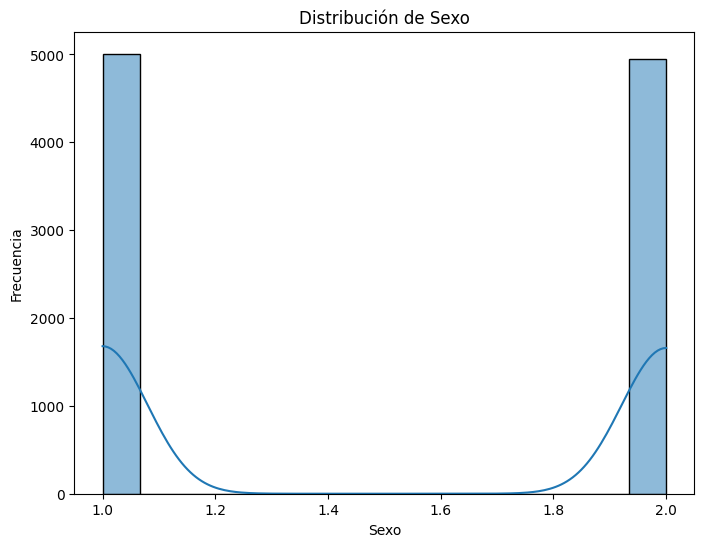

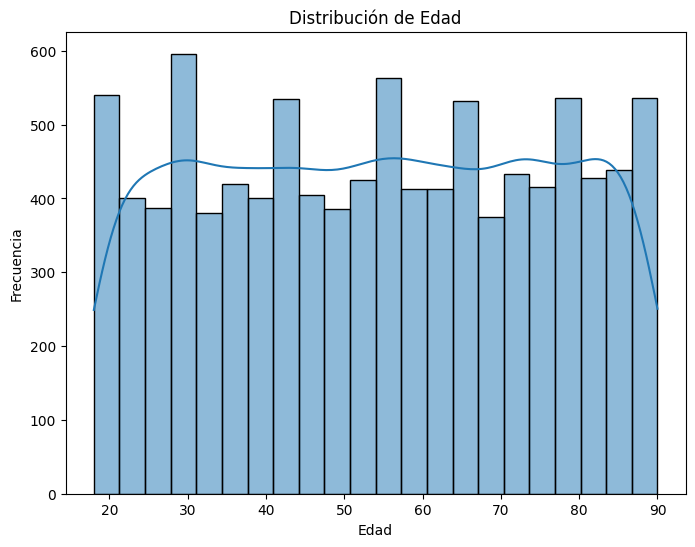

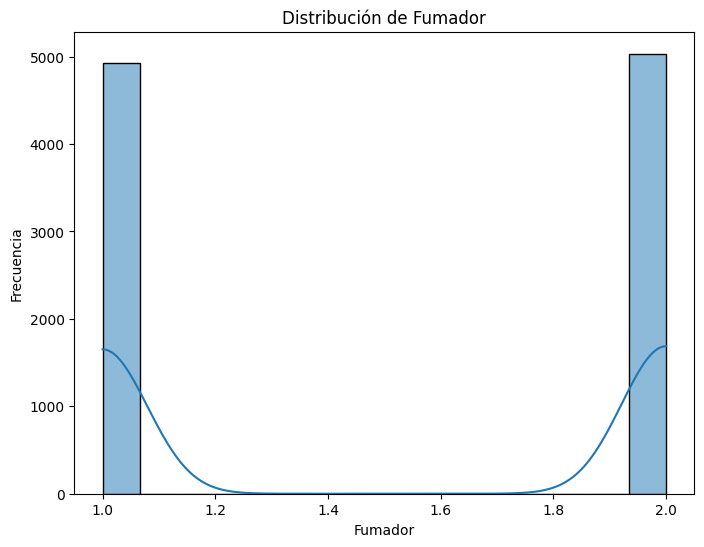

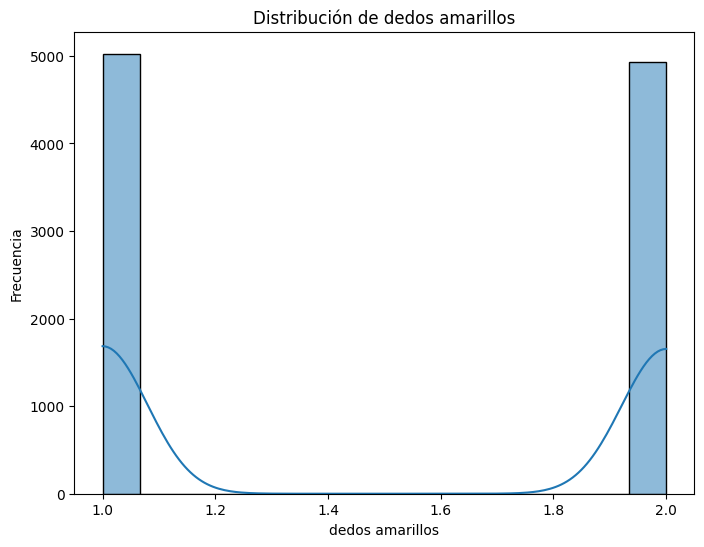

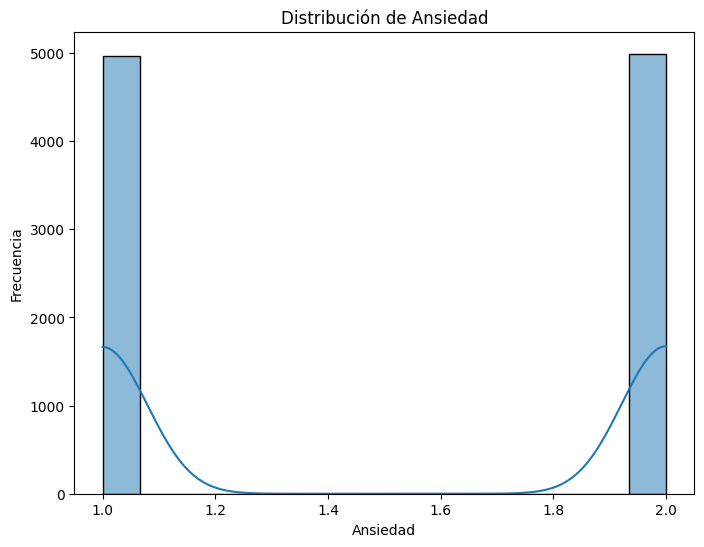

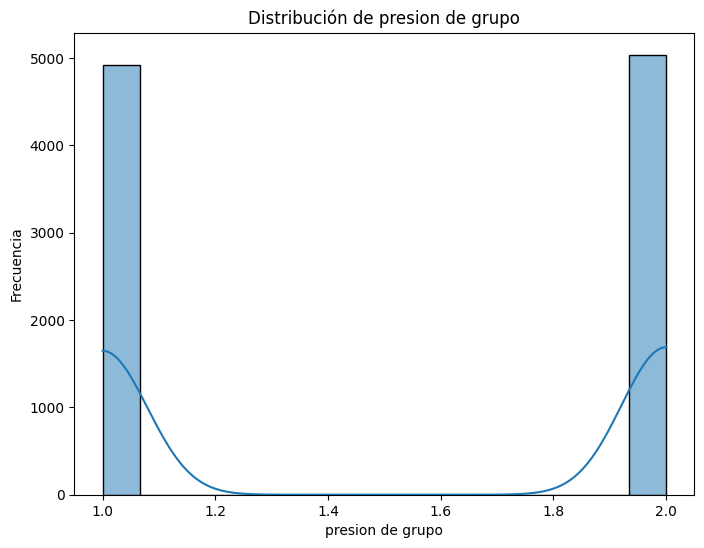

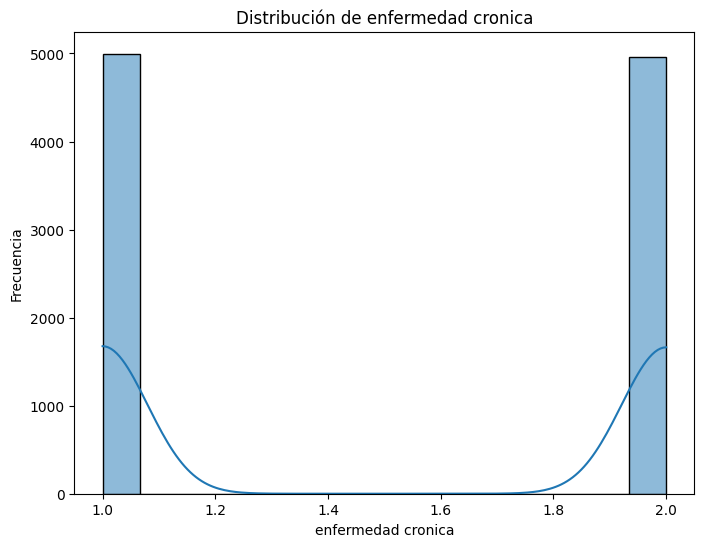

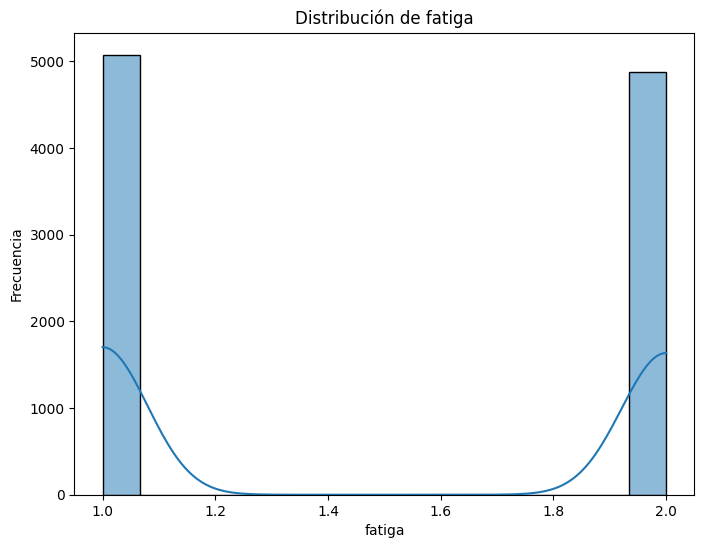

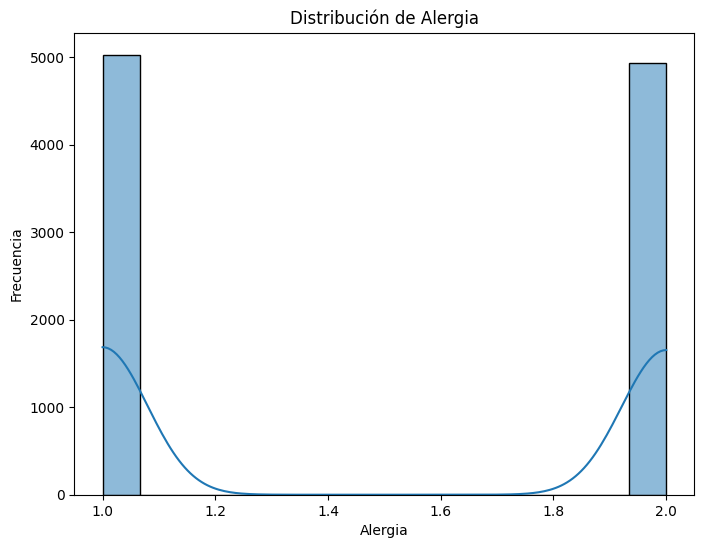

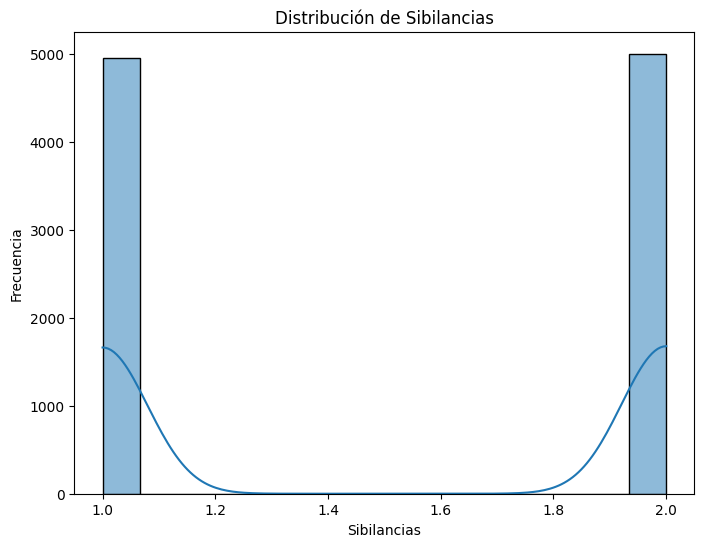

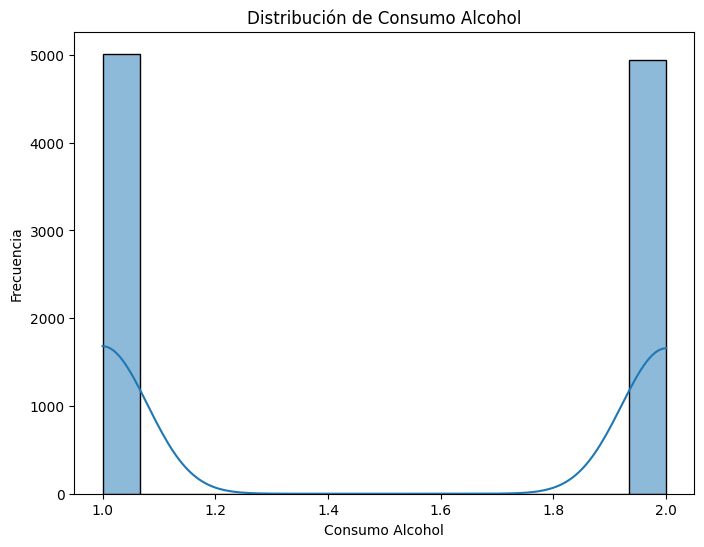

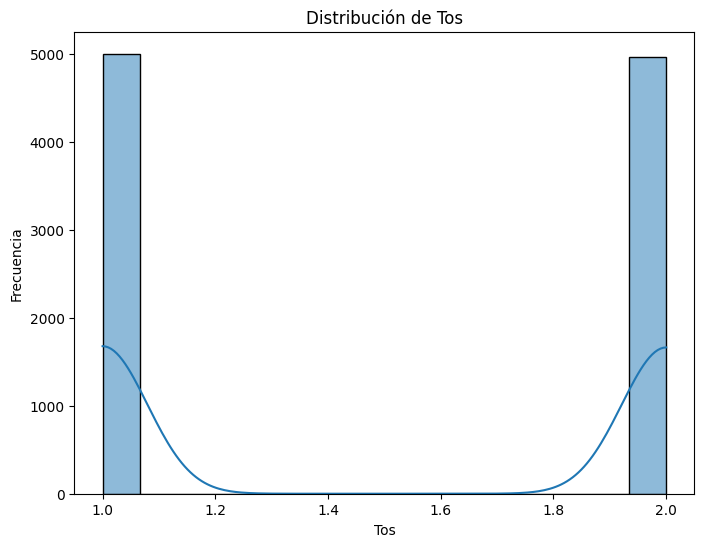

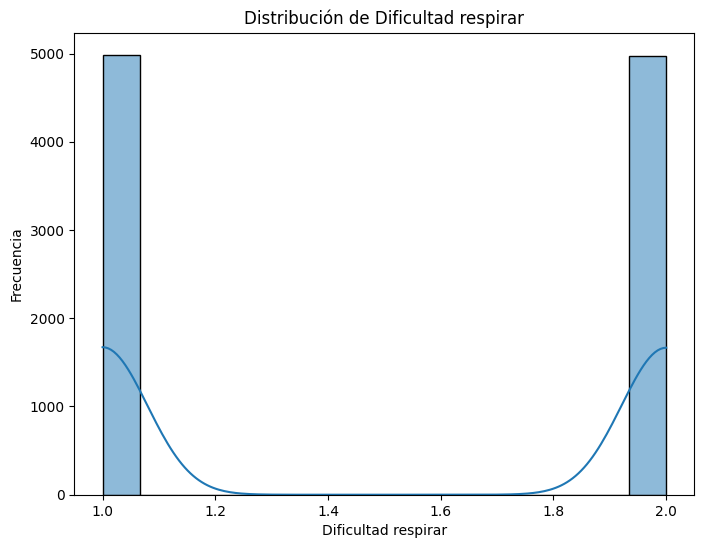

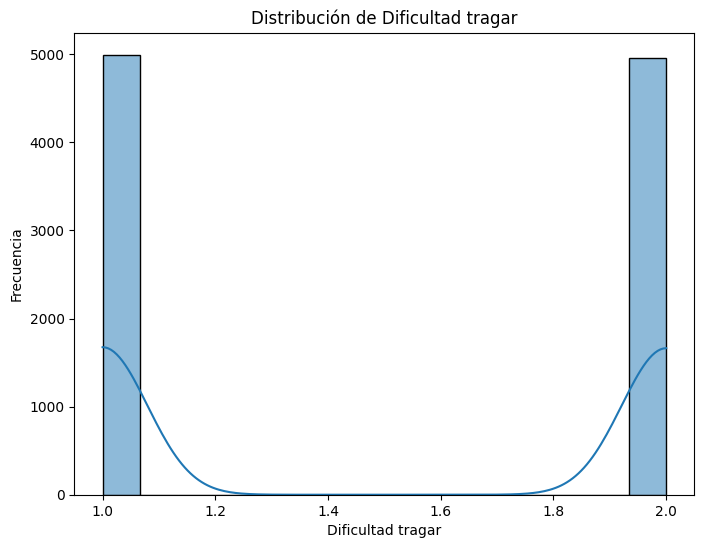

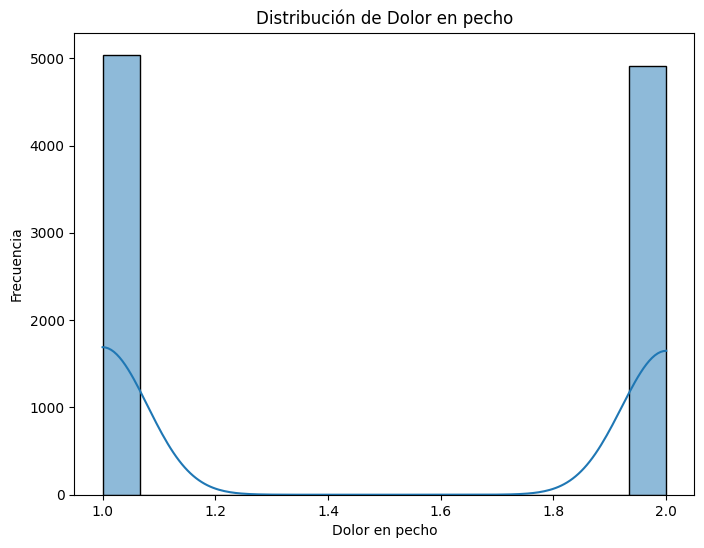

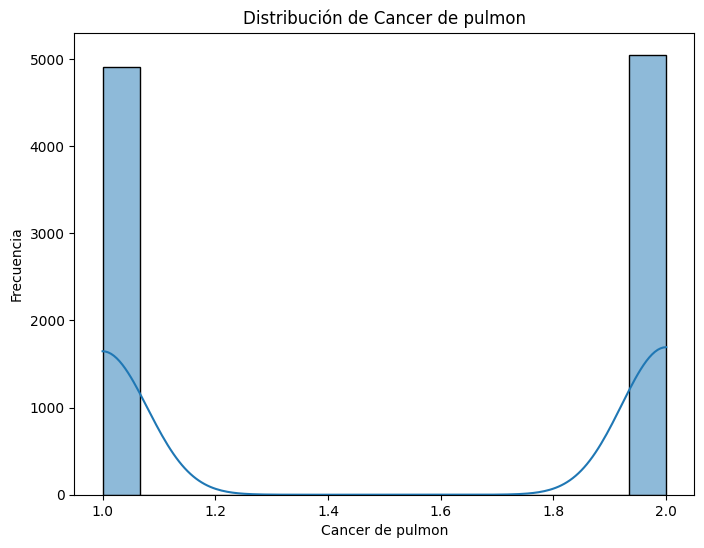

In [ ]:
# Correlación entre variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre variables")
plt.show()

# Gráficos de distribución para cada variable
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()


Conteo de valores para las respuestas:
Cancer de pulmon
2.0    5048
1.0    4908
Name: count, dtype: int64

Correlación entre características y la variable objetivo:


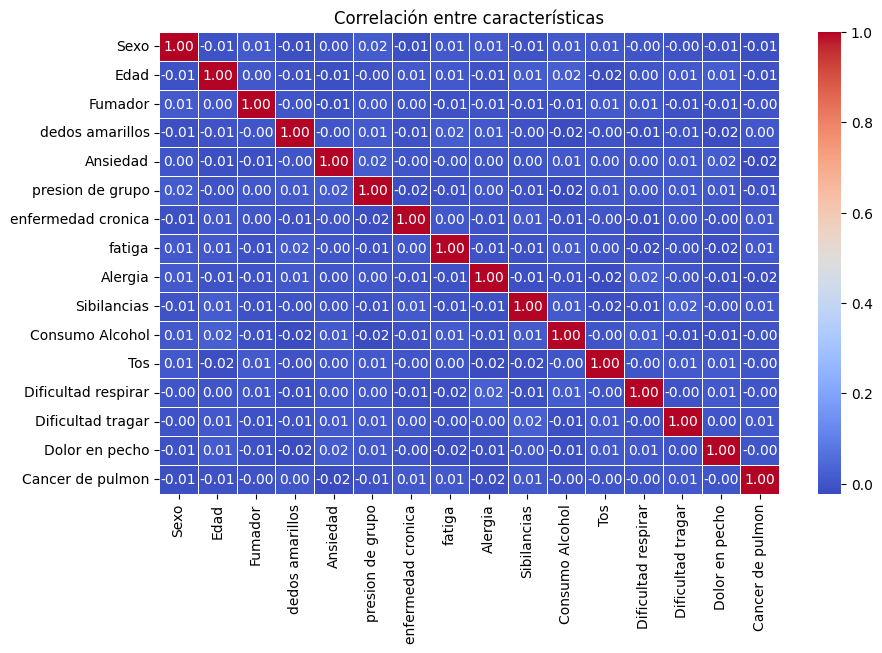

In [ ]:
# Conteo de valores para 1 y 2
print("\nConteo de valores para las respuestas:")
print(df['Cancer de pulmon'].value_counts())

# Análisis de correlación
print("\nCorrelación entre características y la variable objetivo:")
correlacion = df.corr()['Cancer de pulmon'].abs().sort_values(ascending=False)
# Visualizar correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlación entre características')
plt.show()

In [ ]:

# Imprimir características más correlacionadas con la variable objetivo
print("Características más correlacionadas con el cáncer de pulmón:")
print(correlacion)

Características más correlacionadas con el cáncer de pulmón:
Cancer de pulmon       1.000000
Ansiedad               0.020934
Alergia                0.016537
Sexo                   0.010764
enfermedad cronica     0.010702
Edad                   0.010162
Dificultad tragar      0.008285
fatiga                 0.007517
Sibilancias            0.006367
presion de grupo       0.005597
Fumador                0.004573
Consumo Alcohol        0.003718
dedos amarillos        0.001941
Dificultad respirar    0.001783
Tos                    0.001749
Dolor en pecho         0.001432
Name: Cancer de pulmon, dtype: float64


In [ ]:
# Selección de características (ejemplo sencillo)
# Filtrar características con una buena correlación con la variable objetivo
umbral_correlacion = 0.003
caracteristicas_seleccionadas = correlacion[correlacion.abs() > umbral_correlacion].index.tolist()
caracteristicas_seleccionadas.remove('Cancer de pulmon')  # Eliminar la variable objetivo

print("\nCaracterísticas seleccionadas:")
print(caracteristicas_seleccionadas)



Características seleccionadas:
['Ansiedad', 'Alergia', 'Sexo', 'enfermedad cronica', 'Edad', 'Dificultad tragar', 'fatiga', 'Sibilancias', 'presion de grupo', 'Fumador', 'Consumo Alcohol']
